In [8]:
import deblend
import om10
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")

In [9]:
db = om10.DB()
db.select_random(maglim=23.3,area=18000.0,IQ=0.75)
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 2813 lenses


In [10]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Choose a good lens system, with large imsep and 4 images:
                      
wide = db.sample[np.where(db.sample['IMSEP'] > 1.0)]
print "Number of lenses with image separation > 1.0 arcsec = ",len(wide)

wide_quads = wide[np.where(wide['NIMG'] == 4)]
print "Number of these with 4 images = ",len(wide_quads)

bright_wide_quads = wide[np.where(wide_quads['MAGI'] < 22)]
print "Number of these with i3 < 22 = ",len(bright_wide_quads)

db.sample = bright_wide_quads    
                      
k = db.sample[0]['LENSID']

Number of lenses with image separation > 1.0 arcsec =  1894
Number of these with 4 images =  277
Number of these with i3 < 22 =  137


OM10: Extracted OM10 lens number 408378:
LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------ -------- ---- ----- ... ------------- ------------- -------------
408378        0    2 0.196 ...         22.81 22.6830534109 23.8796839904
galaxy_x, galaxy_y, PSF_HWHM:
multiplication factor :  2.32345317356e-07
2.53924723851
0.0246380352903
#####################BEFORE DEBLEND PLOT LENSES##################################


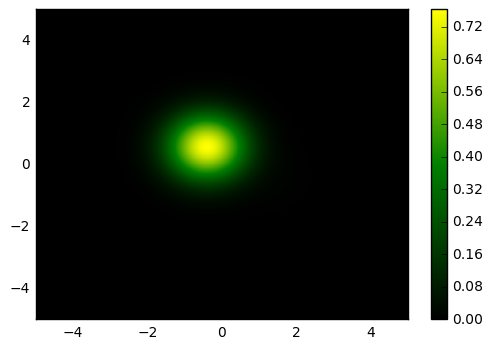

This is the covariance I calculated:  [[ 5605.76149957  -173.96578527]
 [ -173.96578527  5398.97947033]]
This is the eigenvalue I have (array([ 5300.00004158,  5704.74092832]), array([[-0.49452008, -0.8691662 ],
       [-0.8691662 ,  0.49452008]]))
standard deviation is:  72.8010991784
standard deviation is:  75.5297353916


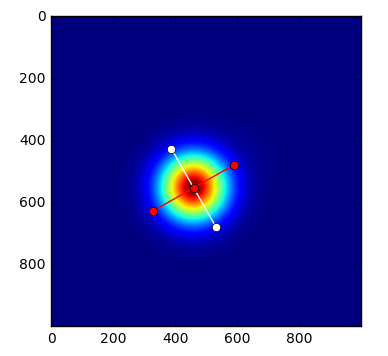

**************zeroth moment:  25638.8549676
**************first moment:  -0.405175646249 0.524000034454
**************second moment:  [[ 5605.76149957  -173.96578527]
 [ -173.96578527  5398.97947033]]
#####################PRINTING NULL DEBLENDER'S PLOT###############################


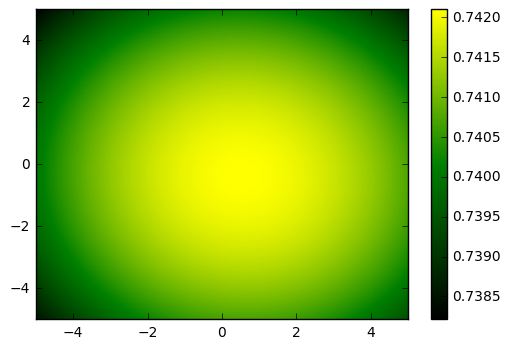

###############################################################################
('chi squared: ', 0.0017013797273349074, 'p: ', 1.0)
('Chi squared distance is : ', (0.0017013797273349074, 1.0))
('KL distance is : ', 10.560489269634084)


In [12]:
realizer.deblend(lensID=k, version=1, null_deblend=True, debug=True, show_plot=True)

OM10: Extracted OM10 lens number 408378:
LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------ -------- ---- ----- ... ------------- ------------- -------------
408378        0    2 0.196 ...         22.81 22.6830534109 23.8796839904
galaxy_x, galaxy_y, PSF_HWHM:
multiplication factor :  1.79186335434e-07
2.53924723851
0.0246380352903
#####################BEFORE DEBLEND PLOT LENSES##################################


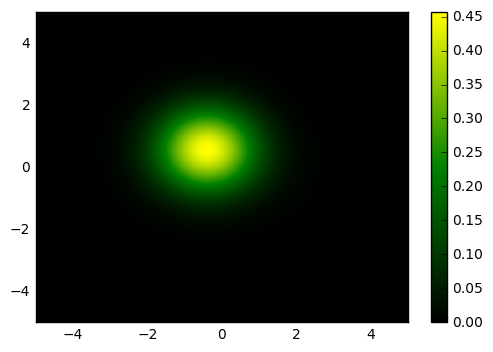

**************zeroth moment:  25638.7974917
**************first moment:  -0.405176161172 0.523995663147
**************second moment:  [[  8.59244806   9.89297324]
 [  9.89297324  12.25153171]]
#####################PRINTING NULL DEBLENDER'S PLOT###############################


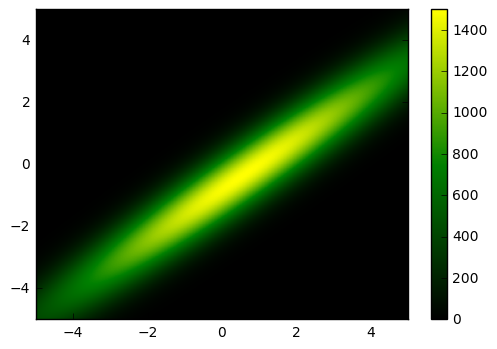

In [13]:
realizer.deblend(lensID=k, version=2, null_deblend=True, debug=True, show_plot=True, report_distance=False)

OM10: Extracted OM10 lens number 408378:
LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------ -------- ---- ----- ... ------------- ------------- -------------
408378        0    2 0.196 ...         22.81 22.6830534109 23.8796839904
galaxy_x, galaxy_y, PSF_HWHM:
multiplication factor :  1.79186335434e-07
2.53924723851
0.0246380352903
#####################BEFORE DEBLEND PLOT LENSES##################################


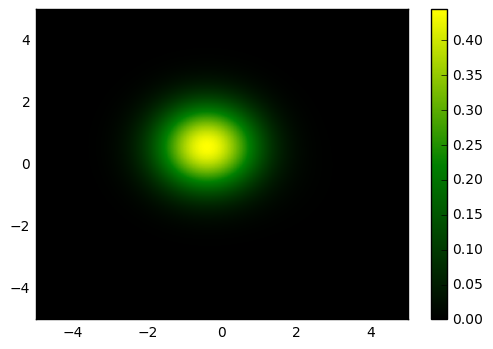

**************zeroth moment:  25638.7788018
**************first moment:  0.523994033797 -0.405175882189
**************second moment:  1.95462768038e-07
#####################PRINTING NULL DEBLENDER'S PLOT###############################


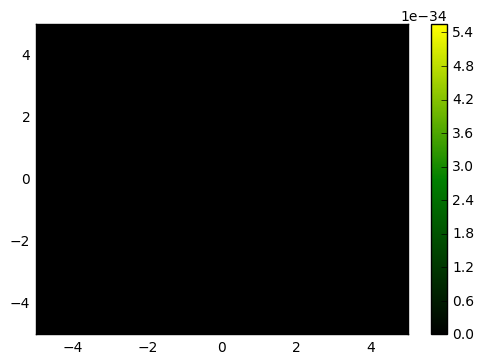

###############################################################################


ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

In [14]:
realizer.deblend(lensID=k, version=3, null_deblend=True, debug=True, show_plot=True, report_distance=True)